# Reporte técnico: Educación en los Estados Unidos

#### Integrantes

*   Juan Esteban Ochoa Gómez
*   Juan David Correa Arango
*   Dioselin Esteban Brito
*   Guillermo Alvarez Morales
*   Santiago Salazar Ramirez

## Introducción

La educación es uno de los pilares más relevantes a la hora de determinar el éxito económico, lo cual provoca una preocupación generalizada por parte de los padres para el otorgar una educación de calidad a sus hijos, previendo así un mejor futuro para ellos. El problema principal es que no se tiene claro qué factores pueden ser críticos para que el estudiante complete sus estudios y para que su educación sea de calidad. El objetivo principal de este trabajo es identificar las barreras claves que desafían los estudiantes y los posibles resultados que pueden provocar, como también qué medidas se deben tomar de acuerdo con las necesidades del estudiante (los padres conocen algunas necesidades de sus hijos, pero al no estar lo suficientemente informados no pueden tomar las mejores decisiones para sus hijos).

El método por emplear para atacar esta problemática será con clustering, el cual se encargará de clasificar grupos de instituciones educativas según las condiciones en las que se encuentren. Con la clasificación ya realizada se facilita el entendimiento de cada grupo de estudiante y el cómo se debe de reforzar la educación en ellos. 

## Objetivos

*   Identificación y caracterización de los diferentes grupos de instituciones educativas que hay en Estados Unidos.
*   Análisis de las posibles medidas a realizar según el grupo de instituciones educativas.
*   Distinción y reconocimiento de los grupos de estudiantes vulnerables.
*   Indagación de la relevancia e incidencia de las variables del estudio.


## Metodología

1.  Preparación de los datos: manejo de los valores nulos, variables categóricas y elección de variables a tratar.
2.  Análisis de las variables seleccionadas: ¿Existen observaciones no consistentes con la definición de la variable?
3.  Correlación entre variables: ¿La correlación entre variables puede afectar el clustering?
4.  Indagación de la cantidad de clusters adecuado para el clustering: Uso de la técnica de codo y dendograma
5.  Realización del clustering.
6.  Caracterización y explicación de los clusters: ¿Qué significa cada agrupación?
7.  Conclusiones y resultados

## Desarrollo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward
import seaborn as sb
warnings.filterwarnings("ignore")

In [2]:
#Se realiza la lectura de los datos que se encuentran en el archivo CollegeScorecard.csv y se almacena en la variable scoreCard la cual contendra la informacion dada por el departamento de Educación de los Estados Unidos.  
scoreCard = pd.read_csv('CollegeScorecard.csv')

In [3]:
# Como es sabido, se recomienda no realizar manipulación sobre el conjunto de datos original, por lo que es necesario la crecion de una copia de este, como se muestra a continuación:
scoreCard2 = scoreCard.copy()

Se importa y visualiza uno de los datasets, el cual se llama CollegeScorecard,su representación se visualiza en la **Figura1**

Figura 1. Visualización de los datos

Dataset: CollegeScorecard

In [4]:
# Aquí se visualiza las 5 primeras filas de la tabla CollegeScoreCard, con el fin de observar un poco la forma del conjunto de datos
scoreCard.head()

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.578873239,0.373790022,0.442857143,0.45890411,0.443586698,0.452513966,0.484818805,0.406,0.423580786,0.44245283
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.847800926,0.678748759,0.767798013,0.739164697,0.732297853,0.795454545,0.760521886,0.755344418,0.751552795,0.765074771
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.807692308,0.61328125,PrivacySuppressed,0.641114983,0.600877193,0.775,0.610465116,0.686567164,0.632653061,0.65
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.892045455,0.689788054,0.800347222,0.75564409,0.738341969,0.851405622,0.768378651,0.79844098,0.778156997,0.791666667
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.482490272,0.315996848,0.32410212,0.350993377,0.320016821,0.380829016,0.364423718,0.286530612,0.315737052,0.334633385


Nota: La Figura 1 representa las primeras 5 filas del dataset

Ahora procederemos a observar las dimensión de la base de datos con la cual se va a realizar el trabajo, en donde podemos observar que la base de datos cuenta con un total de 7804 filas y 1725 columnas.

In [5]:
# En este bloque se muestra en pantalla la dimensión actual de la tabla (# filas x # columnas) con el fin de saber qué tan extensos son los datos a utilizar
print("Filas:",scoreCard.shape[0])
print("Columnas:",scoreCard.shape[1])

Filas: 7804
Columnas: 1725


In [6]:
#Se realiza la lectura de otros datos y se almacenan en la variable collegeDictionary
collegeDictionary = pd.read_csv('https://query.data.world/s/e3kvsd43y7dyhd5acqetzgv5ccjoti')

Ahora se visualiza el dataset llamado collegeDictionary, collegeDictionary se encuentra en la **Figura 2** 

Figura 2

Dataset: collegeDictionary

In [7]:
# Aquí se visualizan las primeras filas de collegeDictionary
collegeDictionary.head()

,NAME OF DATA ELEMENT,Year,dev-category,developer-friendly name,VARIABLE NAME,API data type,label,VALUE,LABEL,SCORECARD? Y/N,SOURCE,NOTES
0,Unit ID for institution,NaN,root,id,UNITID,integer,NaN,NaN,NaN,NaN,IPEDS,NaN
1,8-digit OPE ID for institution,NaN,root,ope8_id,OPEID,integer,NaN,NaN,NaN,NaN,IPEDS,NaN
2,6-digit OPE ID for institution,NaN,root,ope6_id,opeid6,integer,NaN,NaN,NaN,NaN,IPEDS,NaN
3,Institution name,2013,school,name,INSTNM,string,NaN,NaN,NaN,Y,IPEDS,NaN
4,City,2013,school,city,CITY,string,NaN,NaN,NaN,Y,IPEDS,NaN


Nota: La Figura 2 representa las primera 5 filas del diccionario de datos

También se muestran las dimensiones de dicho dataset, incluyendo 1953 filas y 12 columnas.


In [8]:
# En este bloque se muestra la dimensión de la tabla anteriormente leída (# filas x # columnas)
print("Filas:",collegeDictionary.shape[0])
print("Columnas:",collegeDictionary.shape[1])

Filas: 1953
Columnas: 12


Ahora se realiza la selección de las variables que fueron consideradas de interés para realizar la caracterización, agrupamiento o clustering. Para esto se toma la decisión de apoyarse en la clase dada por el Dr. Huebner quien aborda este mismo problema a solucionar por el equipo (Huebner, 2022)

Las variables consideradas fueron:

| Variable      | Definición |
| ----------- | ----------- |
| STABBR      | State abbreviation (Abreviatura del estado)      |
| CONTROL     | Type if school (Tipo de escuela: 1 = publica; 2 = privada sin animo de lucro; 3 = con animo de lucro)     |
| ADM_RATE_ALL  |  Admissions rate (Tasa de admisiones)      |
| SAT_AVG_ALL     |  Average sat score for students admited (Puntuación media en el Sat de los estudiantes admitidos)     |
| UGDS  |  Enrrollment of undergraduate degree-seeking students (Matrícula de los estudiantes que desean obtener un título universitario.)      |
| NPT4_PUB      |  Average net price public colleges (Precio medio neto de instituciones publicas)      |
| NPT4_PRIV  | Average net price private colleges (Precio medio neto de instituciones privadas)      |
| C150_4      | Completion rate (Tasa de finalización)      |
| PCTFLOAN  |   Pct of all undergrads receiving a federal loan (Porcentaje de estudiantes de grado que reciben un préstamo federal)      |
| PCTPELL     |  Pct of all undergrads receiving  a pell grant (Porcentaje de estudiantes de grado que reciben una beca Pell)      |
| PPTUG_EF |   Porcentaje de estudiantes que se matriculan al intersemestral de otoño |

Se debe de realizar ahora un manejo de los valores nulos, dado que el clustering no aceptará valores que sean nulos. Para el caso de los valores continuos se reemplaza el valor nulo con el valor de la mediana. Luego de este manejo de datos se realiza una verificación de que no existan filas repetidas.

In [9]:
# En esta sección se hace la elección de las variables que parecen interesantes y que a la vez son indispensables para la realización de la categorización, agrupamiento ó clustering
# Esta elección se hace con base a una clase dada por el Dr. Rich Huebner.  Fuente: https://www.youtube.com/watch?v=h8XZ8kc6uqo
# Para ir al tiempo preciso o de interés visitar el siguiente link: https://youtu.be/h8XZ8kc6uqo?t=1715

variables = ["STABBR","CONTROL","ADM_RATE_ALL","SAT_AVG_ALL","UGDS","NPT4_PUB","NPT4_PRIV","C150_4","PCTFLOAN","PCTPELL", "PPTUG_EF"]
scoreCard2 = scoreCard2[variables]

In [10]:
# En este bloque se hace un manejo de los valores nan para los datos de tipo continuo
columnas = scoreCard2.columns
for col in columnas:
    if scoreCard2[col].isnull().values.any() == True:
        scoreCard2[col].fillna((scoreCard2[col].median()), inplace=True)

In [11]:
# Posteriormente se eliminan las filas duplicadas, en caso de existir
scoreCard2.drop_duplicates(inplace=True)

In [12]:
# Aquí se procede a revisar la cantidad de valores nulos que hay en el dataset
scoreCard2.isnull().values.any()

False

Se realiza los gráficos de boxplot para unas variables de interés en especifico como lo son  NPT4_PUB y NPT4_PRIV, dado que estas variables están relacionadas con el precio medio neto de las instituciones públicas, y privadas respectivamente. El boxplot es la **Figura 3**.

La **Figura 4** tiene el objetivo de buscar algún número negativo de cantidad de estudiantes en pregrado, ¿por qué? Esto se realiza para eliminar todo valor negativo, puesto que no tiene sentido hablar de una cantidad negativa de estudiantes de pregrado.

Figura 3

Gráfico de Boxplot

In [13]:
import plotly.graph_objects as go
fig = go.Figure()
# Se realizan los boxplot de NPT4_PUB y NPT4_PRIV, dado que son los valores constantes a analizar
fig.add_trace(go.Box(y=scoreCard2["NPT4_PUB"], name = 'Precio Medio Neto Instituciones Públicas',
                marker_color = 'lightseagreen'))

fig.add_trace(go.Box(y=scoreCard2["NPT4_PRIV"], name = 'Precio Medio Neto Instituciones Privadas',
                marker_color = '#FF851B'))                

fig.show()


Nota. La Figura 3 representa un gráfico de Boxplot aplicado al precio medio de instituciones públicas y privadas

Figura 4

Gráfico de Boxplot

In [14]:
# Se realiza un boxplot a UGDS
fig2 = go.Figure()

fig2.add_trace(go.Box(y=scoreCard2["UGDS"], name='Número de estudiantes de pregrado',
                marker_color = 'indianred'))
 
fig2.show()

Nota: La Figura 4 representa un gráfico de Boxplot aplicado al número de estudiante de pregrado

Se observa en el boxplot la presencia de valores negativos en el promedio neto de los costos de las instituciones, algo que no tiene sentido alguno pues se está hablando de costos a pagar y estos no puede ser de carácter negativo. Por ende se realiza la eliminación de dichos datos

In [15]:
# El boxplot muestra que existen valores negativos en el promedio neto de los costes de las instituciones,
# lo cual no tiene sentido de por sí (¿Cómo se puede cobrar algo que es menor a 0?)
# Se van a borrar dichos datos 
scoreCard2 = scoreCard2.loc[scoreCard2['NPT4_PRIV'] >= 0]
scoreCard2 = scoreCard2.loc[scoreCard2['NPT4_PUB'] >= 0]

Se procede a analizar la correlación entre todas las variables seleccionadas anteriormente para determinar cuáles de estas variables presentan una correlación positiva fuerte, moderada, débil o negativa fuerte, moderada, débil. Cabe destacar que la correlación con un valor de 1 se presentará únicamente en variables que se correlacionan con ellas mismas.

La Figura 5 presenta la matriz de correlación entre variables.

Figura 5

Matriz de correlación

<function matplotlib.pyplot.show(close=None, block=None)>

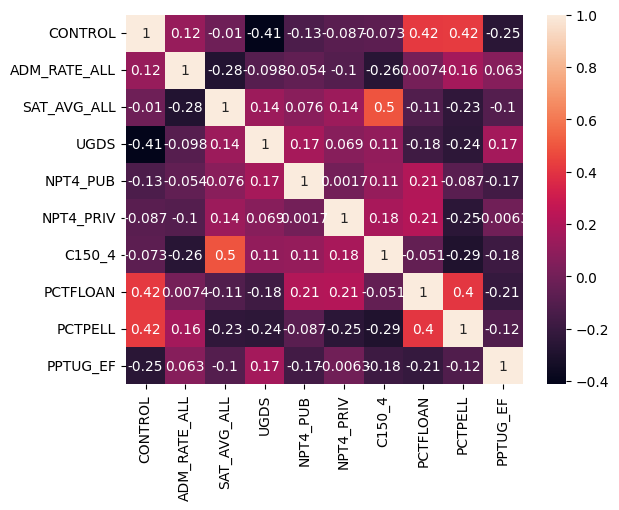

In [16]:
corrMatrix=scoreCard2.corr()
sb.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (50,50)
plt.show

Nota: La Figura 5 representa la matriz de correlación que indica las distintas correlaciones por pares entre las variables de interés

In [17]:
# Se realiza una normalización de los datos
def minmax_norm(df_input):
    return (df_input - df_input.min()) / ( df_input.max() - df_input.min())
scoreCard_org = scoreCard2.copy()
scoreCard2.loc[:, scoreCard2.columns.drop('STABBR')] = minmax_norm(scoreCard2.loc[:, scoreCard2.columns.drop('STABBR')])

Analizando el tipo de correlación que presentan las variables seleccionadas con anterioridad, destacando las que sean más importantes o significativas, se aprecia que CONTROL presenta una correlación positiva débil con las variables PCTPELL y PCTFLOAN, con las demás variables presenta una correlación negativa débil con  UGDS; además se observa que una de las variables que presenta una correlación positiva moderada es SAT_AVG_ALL con C150_4.

Se procede a realizar la normalización de los datos, con el fin de que el peso de una variable no afecte en gran medida al clustering que se está desarrollando. La Figura 6 representa los datos luego de la normalización.

Figura 6

Tabla de datos normalizados

In [18]:
# Se revisa que esta normalización funcionó y se imprime la tabla
scoreCard2.head()

,STABBR,CONTROL,ADM_RATE_ALL,SAT_AVG_ALL,UGDS,NPT4_PUB,NPT4_PRIV,C150_4,PCTFLOAN,PCTPELL,PPTUG_EF
0,AL,0.0,0.8989,0.180876,0.024284,0.491928,0.207757,0.2914,0.8204,0.7115,0.0622
1,AL,0.0,0.8673,0.552995,0.067140,0.543163,0.207757,0.5377,0.5397,0.3505,0.2579
2,AL,0.5,0.7167,0.440092,0.001930,0.321526,0.084264,0.6667,0.7629,0.6839,0.3727
3,AL,0.0,0.8062,0.592166,0.033120,0.643236,0.207757,0.4835,0.4728,0.3281,0.2395
4,AL,0.0,0.5125,0.188940,0.032095,0.437412,0.207757,0.2517,0.8735,0.8265,0.0902


Nota: La Figura 6 representa la normalización de los datos relacionados con las variables de interés

A continuación se procederá a realizar un clustering con el objetivo de el agrupar las variables en grupos con características similares. Para ello primero se procede a realizar la curva de codo, con el fin de poder determinar el número optimo de clústers apropiados para tomar. 

In [19]:
# Hora de realizar el clustering
# Primer paso: curva de codo
tablaClustering = scoreCard2.copy().loc[:, scoreCard2.columns.drop('STABBR')]

In [20]:
#Elbow Method
def elbow_curve(data, maxClusters = 15):

  # rango de valores del parámetro a optimizar (cantidad de clusters)
  maxClusters = range(1, maxClusters + 1)
  inertias = []

  # se ejecuta el modelo para el rango de clusters y se guarda la inercia
  # respectiva obtenida para cada valor
  for k in maxClusters:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(data)
    inertias.append(kmeanModel.inertia_)
  
# Grafico de los resultados obtenidos para cada valor del rango
  print("Valores: ",inertias)
  plt.figure(figsize=(10, 8))
  plt.plot(maxClusters, inertias, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method showing the optimal k')
  plt.show()

Según la Figura 7, el numero óptimo de clústers es 5, dado que en este punto la curva no presenta un cambio significativo en su pendiente.

Figura 7

Curva de codo

Valores:  [3006.47487711043, 1768.8694933883091, 1436.7034799159235, 1239.125920160612, 1100.019968535331, 981.484523360265, 900.8001007066188, 827.8745855901092, 782.1525051522076, 742.8630742444342, 708.3236709415651, 674.412039283201, 646.8231828355915, 623.672794667217, 597.0242031513692]


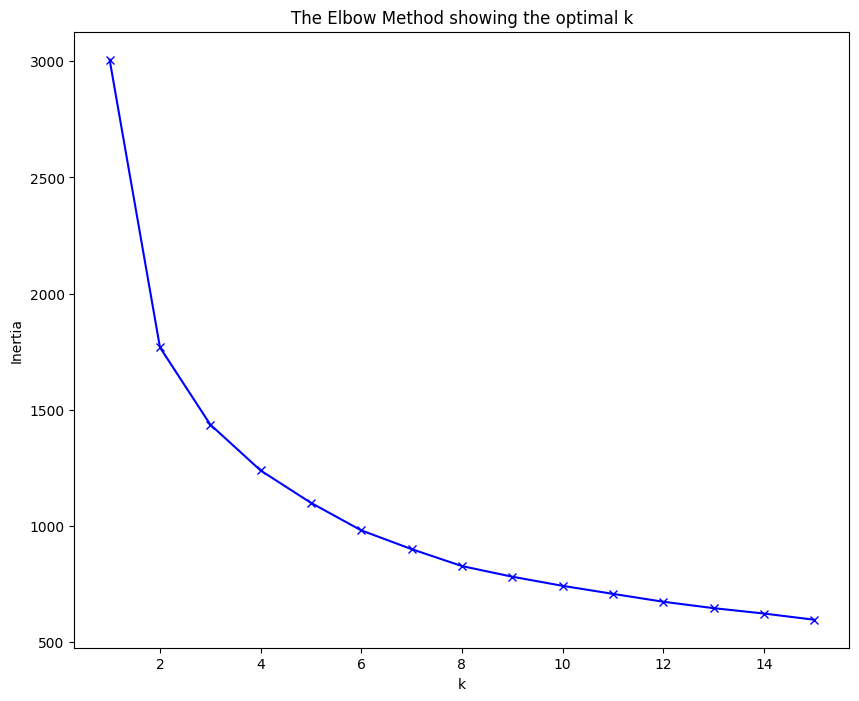

In [21]:
# Se llama la función de elbow_curve
elbow_curve(np.array(tablaClustering.values))

Nota: La Figura 7 representa el gráfico de curva de codo que permite escoger un número k de clusters para el modelo de agrupamiento

El dendrograma realizado en la Figura 8 es un tipo de representación gráfica en forma de árbol que organiza los datos permitiendo verlos en subcategorías hasta llegar a un nivel de detalle deseado. 

Figura 8

Dendrograma

Text(160.0, 17, ' Cinco grupos')

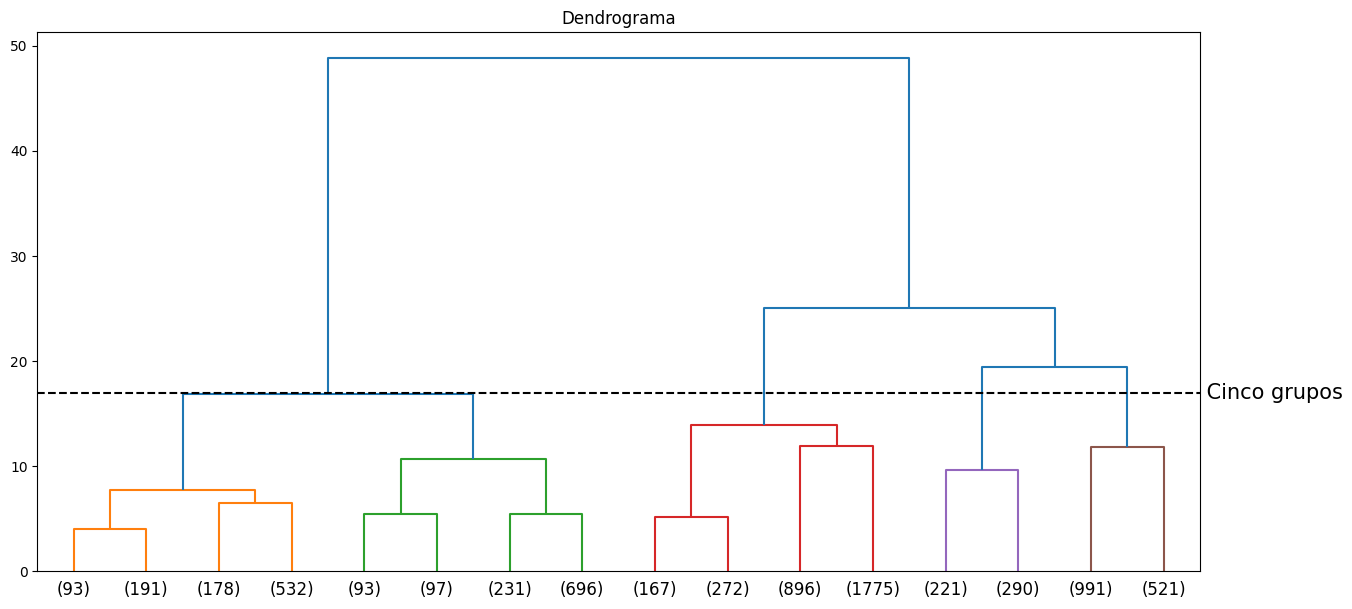

In [22]:
# Se importan las librerias necesarias para hacer el dendograma
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
# Se establecen las dimensiones para el dendograma
pyplot.figure(figsize=(15, 7))  
# Se establece el título del plot a dendograma
pyplot.title("Dendrograma") 
# Se realiza el dendograma
dend = shc.dendrogram(shc.linkage(np.array(tablaClustering.values), method='ward'),truncate_mode='level',p=3, color_threshold=15)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [17, 17], '--', c='k')
ax.text(bounds[1], 17, ' Cinco grupos', va='center', fontdict={'size': 15})

Nota: La Figura 8 representa la organización de los datos mediante un dendrograma

Como se comentó con anterioridad y corroborando con el dendrograma, el número optimo de clústers es de 5.

Se decide hacer uso del modelo kmeans con un número de 5 clúster, para luego realizar un procedimiento con el fin de determinar si el número de clústers es el indicado.

In [23]:
# Se hace el modelo Kmeans con 5 clusters
clustering= KMeans(n_clusters=5, random_state=0)
# Se hace el fit de este modelo con los datos de la tabla modificada
clustering.fit(tablaClustering)
# Se muestran los labels del cluster para verificar que funciona
clustering.labels_

array([4, 4, 2, ..., 1, 1, 1], dtype=int32)

Se organiza la tabla (Figura 9) para luego poder asignar los niveles de los clústers y así poder tener una mejor visualización.

In [24]:
# Se copia la tabla para luego agregar los labels del cluster
final=tablaClustering.copy()
# Se agregan los labels del cluster
final["cluster"]=clustering.labels_
# Se agregan los Estados a los datos
final['States'] = scoreCard2['STABBR']
# Se imprime la tabla

Figura 9

Datos etiquetados

In [25]:
scoreCard_org['labels'] = final['cluster']
scoreCard_org

,STABBR,CONTROL,ADM_RATE_ALL,SAT_AVG_ALL,UGDS,NPT4_PUB,NPT4_PRIV,C150_4,PCTFLOAN,PCTPELL,PPTUG_EF,labels
0,AL,1,0.8989,823.0,4051.0,13415.0,18259.0,0.29140,0.8204,0.7115,0.06220,4
1,AL,1,0.8673,1146.0,11200.0,14805.0,18259.0,0.53770,0.5397,0.3505,0.25790,4
2,AL,2,0.7167,1048.0,322.0,8792.0,7455.0,0.66670,0.7629,0.6839,0.37270,2
3,AL,1,0.8062,1180.0,5525.0,17520.0,18259.0,0.48350,0.4728,0.3281,0.23950,4
4,AL,1,0.5125,830.0,5354.0,11936.0,18259.0,0.25170,0.8735,0.8265,0.09020,4
...,...,...,...,...,...,...,...,...,...,...,...,...
7738,AL,3,0.7167,1048.0,432.5,8792.0,18259.0,0.46545,0.5926,0.5165,0.15035,1
7739,WI,3,0.7679,1048.0,432.5,8792.0,18259.0,0.46545,0.5926,0.5165,0.15035,1
7791,IL,3,0.7167,1048.0,432.5,8792.0,18259.0,0.46545,0.5926,0.5165,0.15035,1
7794,KS,3,0.7679,1048.0,432.5,8792.0,18259.0,0.46545,0.5926,0.5165,0.15035,1


Nota: La Figura 9 representa una tabla de los datos procesados con su respectiva etiqueta obtenida por el agrupamiento

Se obtuvieron 5 grupos que se pueden caracterizar de la siguiente manera:

- El grupo 0, tiene las instituciones privadas con o sin ánimos de lucro, con menor promedio de matriculas de estudiantes que desean obtener un título, y con el menor promedio de precio neto.

- El grupo 1, tiene las instituciones privadas con o sin ánimos de lucro, con el mejor apoyo por parte del estado federal y de posibilidad de entrar con una beca pell, y también tiene la mejor tasa de admitidos y de finalizacion de pregrado.

- El grupo 2, tiene las instituciones privadas con o sin ánimos de lucro, que tiene la menor tasa de estudiantes admitidos, por lo tanto tiene el promedio de las pruebas SAT mas altas, sin embargo tiene buen apoyo por parte del estado federal y de becas pell.

- El grupo 3,  tiene las instituciones públicas y privadas sin ánimos de lucro, con mayor porcentaje de ingreso en intersemestral de otoño, sin embargo, es el grupo que menor apoyo tiene por parte del estado federal y no tiene tantos ingresos con becas pell.

- El grupo 4, tiene las instituciones públicas, con la menor tasa de admitidos y de puntaje promedio SAT, con un apoyo regular tanto por el estado y las becas pell, finalmente con una buena tasa de finalización de pregrado.

Cabe recalcar que el análisis de los grupos se hizo teniendo en cuenta la Figura 10, el gráfico de barras permite analizar la relación entre los grupos y las variables del modelo.

Figura 10

Gráfico de barras

In [34]:
DeepnoteChart(scoreCard_org, """{"mark":{"type":"bar","tooltip":true},"$schema":"https://vega.github.io/schema/vega-lite/v4.json","encoding":{"x":{"sort":{"order":"ascending","encoding":"x"},"type":"nominal","field":"labels","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"C150_4","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"labels","scale":{"type":"linear","zero":false}}},"height":440,"width":"container","autosize":{"type":"fit"},"config":{"legend":{"labelFont":"Inter, sans-serif","labelFontSize":12,"titleFont":"Inter, sans-serif","titleFontSize":12,"titleFontWeight":"bold"},"title":{"anchor":"start","color":"#000000","font":"Inter, sans-serif","fontSize":22,"fontWeight":"normal"},"axis":{"labelFont":"Inter, sans-serif","labelFontSize":12,"labelFontWeight":"normal","titleFont":"Inter, sans-serif","titleFontSize":12,"titleFontWeight":"bold","labelOverlap":"greedy"}}}""")

Nota: La Figura 10 representa un gráfico de barras de los datos relacionando los parámetros Labels y Average según una variable en específico de cada grupo 

## Conclusiones y resultados

- De alguna forma u otra puede concluirse que cada grupo representa cierta ventaja según las necesidades del estudiante. Sin embargo, esto también puede verse como un limitante, debido a que, si algunos de los estudiantes quisieran aspirar a alguna institución en específico, posiblemente no puedan ingresar a ella, ya sea porque no cumplen con alguno de los requisitos exigidos para el ingreso, lo que los llevaría a considerar otras opciones, dentro de las cuales algunas no sean de su gusto

- Puede evidenciarse que existe un apoyo importante por parte del estado en muchas instituciones, pero a su vez hay una ausencia de este en muchas otras. La respuesta a este fenómeno puede encontrarse si hay lugar a preguntas como ¿A qué estado pertenece la institución? ¿Es viable realizar una inversión en tal entidad? ¿La institución presenta una misión y visión con énfasis en un progreso que pueda cumplirse?

- Una comparación entre la tasa de admisión y la tasa de finalización de las carreras permite observar que se guarda una proporción casi que general, es decir, que no es independiente el grupo en el que se encuentren las instituciones. Esta proporción es considerablemente alta, lo que puede representar varios problemas que se pueden condensar en preguntas como: ¿Qué sucede con los estudiantes en el curso de sus carreras? ¿Qué factores influyen en la deserción de estas instituciones? ¿Esta tendencia de deserción en las instituciones influye en la decisión de futuros estudiantes de las mismas? 

# Clustering con datos colombianos

## Introducción

Colombia se define a sí mismo como un país en desarrollo, lo que implica que sigue teniendo problemáticas preocupantes en lo que concierne a pobreza, educación, salud, industria, agricultura, etc. El desarrollo de este proyecto se centró en educación, en vista de que uno de los pilares más relevantes para el ejercicio de la ciudadanía es la educación. La educación colombiana es demasiado desigual, siendo crítica en la educación publica y en zonas rurales, llegando inclusive a poseer una de las tasas más altas de repetición escolar. El reporte del banco mundial es muy claro con ello, afirmando que: "Colombia tiene la segunda tasa de repetición más grande entre todos los países que
 participan en el examen del Programa de Evaluación Internacional de Estudiantes (PISA): el 41
 % de los estudiantes de 15 años ha repetido, al menos un grado." (World Bank Group, 2021, p.22)

El objetivo del proyecto será analizar los diferentes grupos de estudiantes según la calidad educativa que reciben, siguiendo siempre la meta de proponer diferentes soluciones según el contexto en donde se ubica cada grupo. Uno de los pilares del proyecto es conocer el por qué del comportamiento de cada grupo, es decir, ¿Qué factores pueden afectar la calidad de educativa de un estudiante?

## Objetivos

- Detectar las posibles fuentes de información que sean funcionales para la misión del proyecto.

- Analizar los diferentes grupos de estudiantes según su calidad académica.

- Determinar los factores claves que hacen distinguir un grupo de otro.

## Dataset

La base de datos a trabajar es proporcionada por la pagina del ICFES, donde se podra obtener bases de datos anuales con lo resultados a nivel nacional de los estudiantes que presentaron estas pruebas, claramente el objetivo es trabajar con la base de datos mas reciente, estas bases de datos cuentan con información personal de cada uno los estudiantes, ademas cuentan con un total aproximado de 81 variables en donde se podran observar condiciones como lo son la calidad de vida, resultados en cada una de las asignatura evaluadas con sus respectivos promedios, total global obtenido y el nombre de cada institución educativa a las que pertenecen.

Link de la pagina web en donde se podran obtener las bases de datos de los ultimos resultados del ICFES realizados:

https://www.icfes.gov.co/web/guest/acceso-a-bases-de-datos-y-diccionarios?p_l_back_url=%2Fweb%2Fguest%2Fsearch-icfes%3F_com_liferay_portal_search_web_search_bar_portlet_SearchBarPortlet_formDate%3D1667481020126%26_com_liferay_portal_search_web_search_bar_portlet_SearchBarPortlet_emptySearchEnabled%3Dfalse%26q%3Dacceso%2Ba%2Bbases%2Bde%2Bdatos%26_com_liferay_portal_search_web_search_bar_portlet_SearchBarPortlet_scope%3D

## Metodología

1. Entendimiento de los datos del ICFES: valoración de la relevancia de las variables.

undefined. Limpieza del dataset: Manejo de valores nulos y elección de variables a utilizar.

undefined. Preparación del cluster: ¿Qué variables pueden ser nocivas para el análisis?, ¿Qué variables poseen alta correlación entre ellas?

undefined. Explicación del clustering: ¿Qué representa cada grupo?, ¿Qué factores son importantes a tener en cuenta para que un grupo se defina como tal?

undefined. Conclusiones.

# Referencias

*   Huebner, R. (2022, 17 agosto). Introduction to Hierarchical Clustering with College Scorecard Data. Youtube. https://www.youtube.com/watch?v=h8XZ8kc6uqo.

- World Bank Group. (2021). Hacia la construcción de una sociedad equitativa en Colombia.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=daaab6da-726b-43b4-917f-e59c15dec965' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>